In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv("airquality.csv")

In [159]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5


In [160]:
df1 = pd.read_csv("Heart.csv")

In [161]:
df1.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Data cleaning

In [162]:
df.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
dtype: int64

In [163]:
df["Ozone"] = df["Ozone"].fillna(df["Ozone"].mean())
df["Solar.R"] = df["Solar.R"].fillna(df["Solar.R"].mean())

In [164]:
df.isnull().sum()

Unnamed: 0    0
Ozone         0
Solar.R       0
Wind          0
Temp          0
Month         0
Day           0
dtype: int64

In [165]:
df.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.00000,190.000000,7.4,67,5,1
1,2,36.00000,118.000000,8.0,72,5,2
2,3,12.00000,149.000000,12.6,74,5,3
3,4,18.00000,313.000000,11.5,62,5,4
4,5,42.12931,185.931507,14.3,56,5,5


Data integration

In [166]:
merger = pd.merge(df, df1,left_index=True, right_index=True)

In [167]:
merger.head()

,Unnamed: 0_x,Ozone,Solar.R,Wind,Temp,Month,Day,Unnamed: 0_y,Age,Sex,...,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,41.00000,190.000000,7.4,67,5,1,1,63,1,...,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,36.00000,118.000000,8.0,72,5,2,2,67,1,...,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,12.00000,149.000000,12.6,74,5,3,3,67,1,...,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,18.00000,313.000000,11.5,62,5,4,4,37,1,...,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,42.12931,185.931507,14.3,56,5,5,5,41,0,...,204,0,2,172,0,1.4,1,0.0,normal,No


Data transformation

In [168]:
df_months = df.copy()

In [169]:
months_name = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
for i in range(0,12):
    df_months.loc[df_months["Month"]==i+1,"Month"] = months_name[i]

In [170]:
var = [0,50,100,150,200,250,300,350]
df_months["Solar.R"] = pd.cut(df["Solar.R"], bins = var)

Error correcting

In [171]:
df_categorical = df1.select_dtypes(exclude=[np.number])

In [172]:
df_categorical

,ChestPain,Thal,AHD
0,typical,fixed,No
1,asymptomatic,normal,Yes
2,asymptomatic,reversable,Yes
3,nonanginal,normal,No
4,nontypical,normal,No
...,...,...,...
298,typical,reversable,Yes
299,asymptomatic,reversable,Yes
300,asymptomatic,reversable,Yes
301,nontypical,normal,Yes


In [173]:
df_categorical['ChestPain'].unique()

array(['typical', 'asymptomatic', 'nonanginal', 'nontypical'],
      dtype=object)

In [174]:
df_categorical['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [175]:
df1.AHD.replace({"No":0,"Yes":1}, inplace= True)

In [176]:
df1.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


Data model building

In [177]:
from sklearn import linear_model

In [178]:
x = df1[["Age","Sex","RestBP","Chol"]]

In [179]:
y = df1["AHD"]

In [180]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: AHD, Length: 303, dtype: int64

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [182]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 4), (61, 4), (242,), (61,))

In [183]:
X_train

,Age,Sex,RestBP,Chol
132,29,1,130,204
202,57,1,150,126
196,69,1,160,234
75,65,0,160,360
176,52,1,108,233
...,...,...,...,...
188,54,1,192,283
71,67,1,125,254
106,59,1,140,177
270,61,1,140,207


In [184]:
reg = linear_model.LinearRegression()

In [185]:
model = reg.fit(X_train, y_train)

In [186]:
y_pred = model.predict(X_test)

In [187]:
y_pred

array([ 0.52751166,  0.43716742,  0.55763213,  0.50180792,  0.2514266 ,
        0.49346907,  0.70349371,  0.55935674,  0.38421693,  0.59985981,
        0.52778453,  0.16918354,  0.52562229,  0.67014803,  0.76906643,
        0.35682158,  0.07850825,  0.40630572,  0.65004668,  0.19391402,
        0.7706251 ,  0.29766631,  0.55098165,  0.09747637,  0.72221163,
        0.20526213,  0.44094747,  0.63440833,  0.45415823,  0.28316833,
        0.48847845,  0.6149194 ,  0.13143933,  0.57535057,  0.55511966,
        0.33727829,  0.62083447,  0.74488596,  0.56237836,  0.22530683,
        0.62182916,  0.27987586,  0.66538139,  0.56805682,  0.37008383,
        0.59219067,  0.46055777,  0.46243355,  0.28383674,  0.31551122,
        0.65743712, -0.01806018,  0.3004867 ,  0.47535939,  0.61600862,
        0.30377689,  0.58570849,  0.37336819,  0.4222577 ,  0.39616498,
        0.43436826])

In [188]:
r2 = model.score(X_train,y_train)

In [189]:
X_test

,Age,Sex,RestBP,Chol
179,53,1,130,246
228,54,1,110,206
111,56,1,125,249
246,58,1,100,234
60,51,0,130,305
...,...,...,...,...
249,62,1,128,208
104,49,1,120,188
300,57,1,130,131
193,62,0,138,294


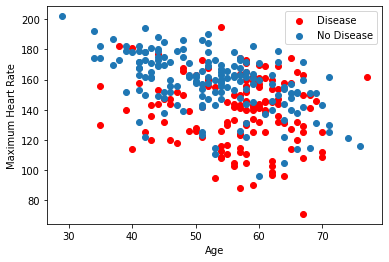

In [ ]:
plt.scatter(x = df1.Age[df1.AHD==1], y= df1.MaxHR[df1.AHD == 1] , color = "red")
plt.scatter(x = df1.Age[df1.AHD==0], y= df1.MaxHR[df1.AHD == 0])
plt.legend(["Disease","No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()